C:\Users\hui\anaconda3\envs\py38\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

<Figure size 640x480 with 0 Axes>

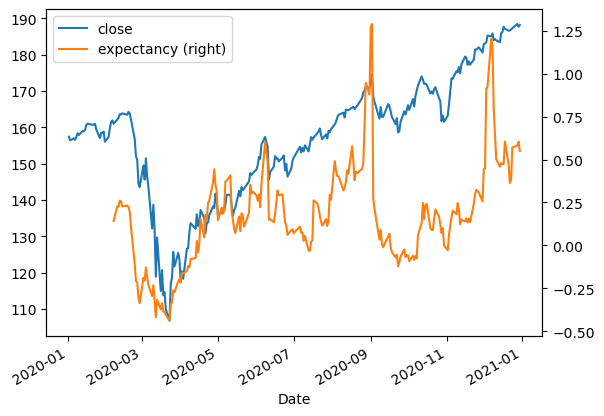

In [1]:
import yfinance as yf
import pandas as pd
import os
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas_ta as ta

plt.figure()
cmap = cm.get_cmap('Spectral')
window=25
spy=round(yf.download(tickers= 'VTI',start= '2020-01-01',end= '2020-12-31', interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)['Close'],2).to_frame()
spy.columns=['close']
spy['p']=spy['close'].diff().rolling(window).apply(lambda x: x.gt(0).sum())/window
spy['q']=spy['close'].diff().rolling(window).apply(lambda x: x.lt(0).sum())/window
spy['odd']=spy['p']/spy['q']
spy['avggain']=spy['close'].diff().rolling(window).apply(lambda x: x[x>0].sum())/(spy['p']*window)
spy['avgloss']=spy['close'].diff().rolling(window).apply(lambda x: x[x<0].sum())/(spy['q']*window)
spy['payoff']=-spy['avggain']/spy['avgloss']
spy['expectancy']=spy['p']*spy['payoff']-spy['q']
spy[['close','expectancy']].plot(secondary_y=['expectancy'])



[*********************100%***********************]  1 of 1 completed


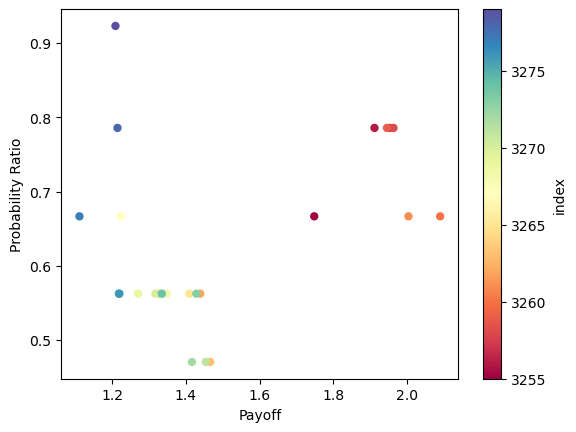

In [3]:

window=25
spy=round(yf.download(tickers= 'spy',start= '2010-01-01', interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)['Close'],2).to_frame()
spy.columns=['close']
spy['p']=spy['close'].diff().rolling(window).apply(lambda x: x.gt(0).sum())/window
spy['q']=spy['close'].diff().rolling(window).apply(lambda x: x.lt(0).sum())/window
spy['odd']=spy['p']/spy['q']
spy['avggain']=spy['close'].diff().rolling(window).apply(lambda x: x[x>0].sum())/spy['p']
spy['avgloss']=spy['close'].diff().rolling(window).apply(lambda x: x[x<0].sum())/spy['q']
spy['payoff']=-spy['avggain']/spy['avgloss']
spy['expectancy']=spy['p']*spy['payoff']-spy['q']
spy.reset_index(inplace=True)
spy.reset_index(inplace=True)
fig, ax = plt.subplots()
spy.iloc[-window*2:-window].plot.scatter(x='payoff',y='odd',c='index',s=25,colormap=cmap,colorbar=True,ax=ax)
plt.xlabel('Payoff')
plt.ylabel('Probability Ratio')
plt.show()
#plt.plot(spy['payoff'][-window:],spy['expectancy'][-window:],linestyle='dashed', marker='s')
#plt.plot(spy['payoff'][-window],spy['expectancy'][-window],color='r', marker='s')

<AxesSubplot:xlabel='payoff', ylabel='expectancy'>

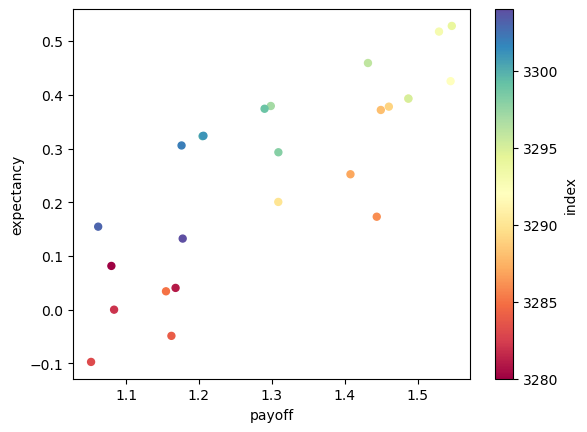

In [4]:
spy['p']=spy['close'].diff().rolling(window).apply(lambda x: x.gt(0).sum())/window
spy['q']=spy['close'].diff().rolling(window).apply(lambda x: x.lt(0).sum())/window
spy['odd']=spy['p']/spy['q']
spy['avggain']=spy['close'].diff().rolling(window).apply(lambda x: x[x>0].sum())/spy['p']
spy['avgloss']=spy['close'].diff().rolling(window).apply(lambda x: x[x<0].sum())/spy['q']
spy['payoff']=-spy['avggain']/spy['avgloss']
spy['expectancy']=spy['p']*spy['payoff']-spy['q']
#spy.reset_index(inplace=True)
#spy.reset_index(inplace=True)
spy.iloc[-window:].plot.scatter(x='payoff',y='expectancy',c='index',s=25,colormap=cmap,colorbar=True)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'BIDU'}, xlabel='Date'>

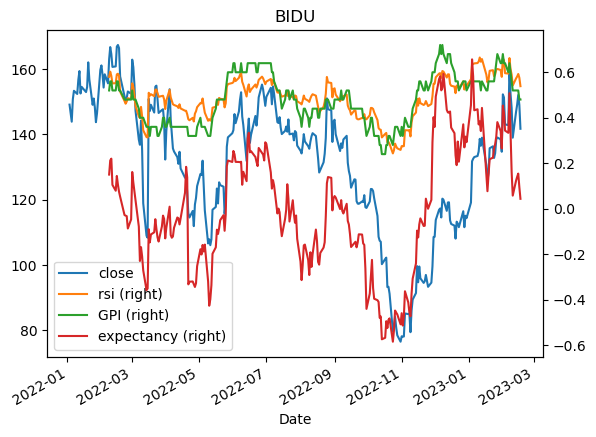

In [5]:
def get_indicator(q, ind_name, params):
    ts = None
    if ind_name == 'rsi':
        ts = q.ta.rsi(params['length']) / 100 
    return ts


window=25
ticker='BIDU'
df=round(yf.download(tickers= ticker,start= '2022-01-01',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)['Close'],2).to_frame()
df.columns=['close']
df['p']=df['close'].diff().rolling(window).apply(lambda x: x.gt(0).sum())/window
df['q']=df['close'].diff().rolling(window).apply(lambda x: x.lt(0).sum())/window
df['odd']=df['p']/df['q']
df['avggain']=df['close'].diff().rolling(window).apply(lambda x: x[x>0].sum())/df['p']
df['avgloss']=df['close'].diff().rolling(window).apply(lambda x: x[x<0].sum())/df['q']
df['payoff']=-df['avggain']/df['avgloss']
df['expectancy']=df['p']*df['payoff']-df['q']
df['rsi'] = get_indicator(df, 'rsi', {'length': window})
#df['rsi_ma'] =df['rsi'].rolling(window).mean()

df['GPI']=df['close'].diff().rolling(window).apply(lambda x: x.gt(0).sum())/window
#df['q']=df['close'].diff().rolling(window).apply(lambda x: x.lt(0).sum())/window
#df['GPI']=df['p']/df['q']
df[['close','rsi','GPI','expectancy']].plot(secondary_y=['rsi','GPI','expectancy'],title=ticker)